In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('C:\\NFL_Data\\NFL_PBP2022.csv', low_memory=False)

In [59]:
#teams 
teams_dict = {
     'Lex' : ['J.Fields', 'M.Ryan', 'L.Jackson' ], 
     'Brent'   : ['D.Prescott', 'R.Tannehill', 'B.Mayfield'  ],
     'Clarke' : ['M.Jones', 'D.Mills', 'C.Wentz'], 
     'Shea' : ['J.Hurts', 'K.Murray', 'D.Carr' ], 
     'Papi' : ['T.Brady', 'Z.Wilson', 'J.Herbert' ], 
     'Bleacher' : ['G.Smith', 'D.Locke', 'T.Lawrence' ], 
     'Connor' : ['T.Lance', 'M.Stafford', 'P.Mahomes'],
     'Dane' : ['J.Goff', 'T.Tagovailoa', 'J.Garoppolo'], 
     'Rob' : ['M.Mariota', 'J.Allen', 'D.Jones' ] ,
     'Riley' : ['M.Trubisky', 'J.Burrow', 'J.Winston']   
    }

In [60]:
dict_df = pd.DataFrame(teams_dict)
team_df = dict_df.melt(var_name='team', value_name ='player')

In [61]:
#load in 2022 pbp data 
pbp_df = pd.read_csv('C:\\NFL_Data\\NFL_PBP2022.csv', low_memory=False)

#filter to pass plays and limit to important columns
df_int = pbp_df.loc[pbp_df['play_type']=='pass', ['passer_player_id', 'passer_player_name', 'pass_attempt', 'interception']].copy(deep=True)

In [62]:
updated_results = team_df.merge(df_int.groupby(['passer_player_name', 'passer_player_id'], as_index=False).agg({'interception' : sum, 'pass_attempt' : sum}).sort_values(by='interception', ascending=False), how='left', left_on = 'player', right_on = 'passer_player_name').fillna(0).groupby('team', as_index=False).interception.sum().sort_values(by='interception', ascending=False)

Text(0.5, 1.0, 'Scorps Int League')

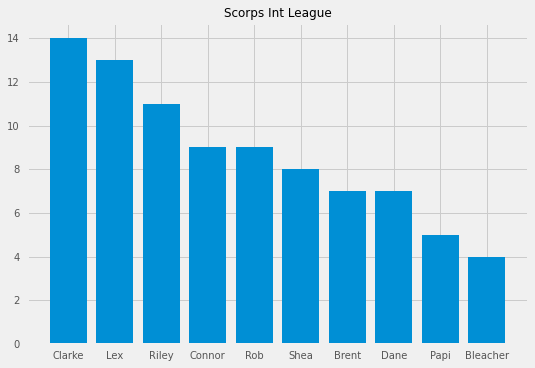

In [63]:
from matplotlib import pyplot as plt, style
style.use('ggplot')
style.use('fivethirtyeight')
style.use('seaborn-notebook')

plt.bar(updated_results['team'], updated_results['interception'])
plt.title("Scorps Int League")

In [64]:
team_df.merge(df_int.groupby(['passer_player_name', 'passer_player_id'], as_index=False).agg({'interception' : sum, 'pass_attempt' : sum}).sort_values(by='interception', ascending=False), how='left', left_on = 'player', right_on = 'passer_player_name').fillna(0)

,team,player,passer_player_name,passer_player_id,interception,pass_attempt
0,Lex,J.Fields,J.Fields,00-0036945,4.0,83.0
1,Lex,M.Ryan,M.Ryan,00-0026143,5.0,169.0
2,Lex,L.Jackson,L.Jackson,00-0034796,4.0,125.0
3,Brent,D.Prescott,D.Prescott,00-0033077,1.0,31.0
4,Brent,R.Tannehill,R.Tannehill,00-0029701,3.0,107.0
5,Brent,B.Mayfield,B.Mayfield,00-0034855,3.0,129.0
6,Clarke,M.Jones,M.Jones,00-0036972,5.0,103.0
7,Clarke,D.Mills,D.Mills,00-0036898,4.0,153.0
8,Clarke,C.Wentz,C.Wentz,00-0032950,5.0,194.0
9,Shea,J.Hurts,J.Hurts,00-0036389,2.0,133.0
